$\qquad$ $\qquad$$\qquad$  **TDA 232 / DIT 381: Home Assignment 4, part 1 - Image classification (20 points)** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Image classification using fully-connected and convolutional neural networks** <br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Emilio, Simon** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 22/5** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Fikri Farhan Witjaksono, 19950822-4756, fikrif@student.chalmers.se** <br />

In [0]:
#reset parameter and all variables, if necessary uncomment
#%reset

In [0]:
#cuda version check
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [0]:
#library installation, uncomment below and run once, and restart after installation

!pip install catsndogs
#!pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

In [0]:
#library check
!pip list

Package                  Version        
------------------------ ---------------
absl-py                  0.9.0          
alabaster                0.7.12         
albumentations           0.1.12         
altair                   4.1.0          
appdirs                  1.4.4          
asgiref                  3.2.7          
astor                    0.8.1          
astropy                  4.0.1.post1    
astunparse               1.6.3          
atari-py                 0.2.6          
atomicwrites             1.4.0          
attrs                    19.3.0         
audioread                2.1.8          
autograd                 1.3            
Babel                    2.8.0          
backcall                 0.1.0          
beautifulsoup4           4.6.3          
bleach                   3.1.5          
blis                     0.4.1          
bokeh                    1.4.0          
boto                     2.49.0         
boto3                    1.13.13        
botocore        

General guidelines:
* All solutions to theoretical and pratical problems must be submitted in this notebook, and equations should be formatted using LaTeX math-mode.
* For each exercise part, add cells containing the requested text, code or figures into this notebook.
* Your notebook should contain all required cell output, so that we don't have to execute the code. However, should we decide to, your notebook should run and reproduce the results up to stochastic variability. A good idea is to make sure it runs on Google Colab before submission.
* **Submit your solutions as notebook file (`.ipynb`) and in HTML format (`.html`).** To export this notebook to HTML format click `File` $\rightarrow$ `Download as` $\rightarrow$ `HTML`.

> **Note:** Training neural networks is computationally demanding and may take  time if you run it on your laptop. Running the code in Google Colab will likely be faster and you can even get access to a GPU.

> **Note:** To enable GPU hardware accelartion in Google Colab, click the `Change runtime type` field in the `runtime` drop-down menu, then choose `GPU` under hardware acceleration.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/simonpf/teaching/blob/master/machine_learning/2020/HW4a_2020.ipynb)

## Required software

For this assignment you will need to install the following Python packages:
- `pytorch`: Installation instructions can be found on the [pytorch homepage](https://pytorch.org/get-started/locally/) (pre-installed in Google Colab)
- `torchvision`: Typically installed with pytorch
- `catsndogs`: The data set we will be working with. To install it, run:

```
pip install catsndogs

```

> **Note:** In Google Colab you can install packages using   `!pip  <package_name>`

# Assignment 4, Part 1
# Theoretical exercises

## [Exercise 1: Backpropagation by hand, 1 point]

Consider the simple feed-forward neural network depicted in the figure below. This network
consists of an input layer $\mathbf{y}_0 = \mathbf{x}$ with 3 features,  one hidden layer
with activations $\mathbf{y}_1$ and a one-dimensional output layer with activations $\mathbf{y}_2$.

![Neural network illustration.](https://raw.githubusercontent.com/simonpf/teaching/master/machine_learning/2020/simple_nn.png)


The activations of a layer $i$ are computed by applying a linear transformation given by the weight matrix
$\mathbf{W}_i$ to the input activations $\mathbf{y}_{i - 1}$ producing the intermediate values $\mathbf{z}_i$:

$$
z_{i : j} = \sum_k W_{i:j, k} y_{i - 1:k} \\
$$

This is followed by the element-wise application of the layers'
activation function $f_i$ to the intermediate values $\mathbf{z}_i$:

$$
y_{i:j} = f_i (z_{i:j})
$$

> **Note:** The notation here uses '$:$' to separate layer from element indices. $W_{i:j,k}$ thus refers to the element in row $j$ and column $k$ in the weigth matrix $\mathbf{W}_i$ of the $i$th layer.


### 1, a)

Given the derivative of an error term $E$ with respect to the activation of the output neuron 
$\frac{dE}{dy_{2:0}}$, derive expressions for the derivatives of the error term with respect to the weights
$W_{i:j,k}$ and activations $y_{i:j}$ of the remaining layers of the network.

To simplify the results, you are encouraged to reuse derivatives you have already computeds in the expressions for the  downstream derivatives.

$$
\begin{align}
\frac{dE}{dW_{2:i, j}} = \: ? \\
\frac{dE}{dy_{1:j}} = \: ? \\
\frac{dE}{dW_{1:i, j}} = \: ? \\
\frac{dE}{dy_{0:j}} = \: ? \\
\end{align}
$$

If your calculations are correct, you should see that you can express the derivatives of the error function 
around a given layer in the network using the derivatives from the next higher layer. This yields a simple
recipe to successively compute the gradients in a feed forward neural network by starting at the last layer and
then computing the gradients layer-by-layer as you move backwards through the network. This method is commonly
referred to as **backpropagation**.



## [Exercise 2: Loss function for binary classification, 1 point]

Assume that your task is to predict a binary class variable $Y \in \{0, 1\}$ conditional on some input $X$ using a neural network. To do so you want to train a network to predict the probability $p$ of a bernoulli distribution:

\begin{align}
P(Y | X) \sim \text{Bernoulli}(p = f(x)),
\end{align}

where $f$ represents the function to be learned by the neural network.

### 2, a)

Given independent pairs of samples $(x_1,  y_1), \ldots, (x_n, y_n)$ show that minimizing the binary cross entropy loss

\begin{align}
BCE = -\frac{1}{n}\sum_{i = 1}^n (1 - y)\log(f(x) - 1) + y\log(f(x))
\end{align}

maximizes the likelihood of the data.

> Hint: Note that the probability function of Bernoulli distributed variable $Y \sim \text{Bernoulli}(p)$ can be written $P(Y = y) = p^y\ (1- p)^{(1-y)}$


Given independent pairs of samples $(x_1,  y_1), \ldots, (x_n, y_n)$ show that minimizing the binary cross entropy loss

\begin{align}
BCE = -\frac{1}{n}\sum_{i = 1}^n (1 - y)\log(f(x) - 1) + y\log(f(x))
\end{align}

maximizes the likelihood of the data.

> Hint: Note that the probability function of Bernoulli distributed variable $Y \sim \text{Bernoulli}(p)$ can be written $P(Y = y) = p^y\ (1- p)^{(1-y)}$

$\underline{\textbf{Answer:}}$

The likelihood in the function for this model over n data points could be written as :

$$ p(y|x_{i}\theta) = \prod_{i=1}^{n} p_{\theta}(y|x_{i})^{y_{i}}(1-p_{\theta}(y|x_{i}))^{1-y_{i}}  $$

The log-likelihood could be expressed as 

$$ log \left(p(y|x_{i}\theta)\right) =  log\left(\prod_{i=1}^{n}p_{\theta}(y|x_{i})^{y_{i}}(1-p_{\theta}(y|x_{i}))^{1-y_{i}}\right) $$

The maximization of the negative log-likelihood with respect to $\theta$ will results in 

$$ \mathcal{L}(\theta;x,y) = -\sum_{i=1}^{n} y_{i}\log p_{\theta}(y|x_{i}) + (1-y_{i})\log(1-p_{\theta}(y|x_{i})) $$

On the other hand, Expressing the term $f(x)$ as $p$, we will have the following equation

$$   BCE = -\frac{1}{n}\sum_{i=1}^{n} y_{i}\log p_{\theta}(y|x_{i}) + (1-y_{i})\log(1-p_{\theta}(y|x_{i}))    $$

By minimizing the BCE above with respect to $\theta$, we would get the following equation

$$     \frac{\partial BCE}{\partial\theta} =-\sum_{i=1}^{n} y_{i}\log p_{\theta}(y|x_{i}) + (1-y_{i})\log(1-p_{\theta}(y|x_{i}))   $$

which is the same equation that we get from maximizing the log likelihood above.

## [Exercise 3: Counting parameters in networks, 1 point]

### 2, a)
Imagine you apply a two layer fully connected network to a 28x28 rgb image. The hidden layer has dimension 256 and the output is of size 10. How many parameters are necessary? Include the bias parameters.

$\underline{\textbf{Answer:}}$

The calculation process is described as below

![2](https://user-images.githubusercontent.com/58375350/81991086-c119fa80-9640-11ea-8911-8440dfd9a603.jpg)


The number of parameters could be calculated as below

$$     \text{Parameters} \rightarrow 2352 \times 256 + 256 \times 256 + 256 \times 10 = 670208\;\text{Parameters}        $$

$$ \text{Biases} \rightarrow 256 + 256 + 10 = 522 \;\text{Biases} $$

$$ \text{Total Parameters}  = \text{Parameters} + \text{Biases} = 670208 + 522 = 670730\;\text{Parameters} $$


### 2, b)

Apply the following network to the same image, how many parameters are needed? Include bias parameters. Show your calculations.

* Convolutional layer with 8 3x3 filters (stride 1).

* Max pooling layer (2x2) (stride 2).

* Convolutional layer with 16 3x3 filter (stride 1).

* Fully connected layer to ouput of size 10.

$\underline{\textbf{Answer:}}$

The process could be described by the picture below

![1](https://user-images.githubusercontent.com/58375350/81990889-5b2d7300-9640-11ea-911e-368f3e6bc64a.jpg)


In above figure, the followings are the notations meaning

$$ \text{f} \rightarrow \text{filter size} $$

$$ \text{s} \rightarrow \text{stride} $$

$$ \text{CONV1} \rightarrow \text{1st Convolutional Layer} $$

$$ \text{Maxpool1} \rightarrow \text{1st Maxpool Layer} $$

$$ \text{CONV2} \rightarrow \text{2nd Convolutional Layer} $$

$$ \text{FC3} \rightarrow \text{3rd Fully Connected Layer} $$


Moreover, the parameters could be calculated as below

![task3 2 b](https://user-images.githubusercontent.com/58375350/81745929-f1796180-94a5-11ea-89c0-a849ce110ca3.jpg)

From the calculation shown above, we could conclude that the total number of parameters that are needed to build the networks is **20042  parameters**.

## [Excercise 4: Calculating output dimensions of a convolutional layer, 1 point]

Assume you apply a convolutional layer with 8 3x3 filters (stride 1) on a rgb 28x13 image. What will the dimensions of the output be (assuming no padding is done in the convolution)?

$\underline{\textbf{Answer:}}$

The n-th dimension of the output could be calculated using the following formula

$$ \text{Output}_{\text{dim(n)}} = \frac{W_{n}-K+2P}{S} + 1  $$

where

$$ W_{n} \rightarrow \text{the Input Volume size of n-th dimension} $$
$$ K \rightarrow \text{the Kernel size} $$
$$ P \rightarrow \text{the Padding} $$
$$ S \rightarrow \text{the Stride} $$

Then, from formula stated above, we could calculate the dimension of the output as

$$  \text{Output}_{\text{dim(1)}} = \frac{28-3}{1} + 1 = 26                   $$

$$  \text{Output}_{\text{dim(2)}} = \frac{13-3}{1} + 1 = 11                   $$

The third dimension of the output will follow the number of filters provided which is 8. Hence, the full dimension of the output would be

$$ \text{Output}_{\text{dim(full)}} = 26\times 11 \times 8 $$


## [Excercise 5: Applying a filter to an image, 1 point]

\begin{align}
\text{Image:} 
\begin{bmatrix}2 & 2 & 1 & 2 \\
               -2 & -2 & -1 & 1 \\
               1 & 1 & 2 & 1 \\
               1 & 1 & 3 & 1 
\end{bmatrix}
\ \ 
\text{Filter:}
\begin{bmatrix}1 & 1
\\-1 & -1
\end{bmatrix}
\end{align}

Convolve the filter over the image and apply ReLU, use a stride of 2 with a bias of -2. Try to give an explanation for the output, what is the filter detecting?

$\underline{\textbf{Answer:}}$


Convolution is a neighborhood operation in which each output pixel is the weighted sum of neighboring input pixels. The matrix of weights is called the convolution kernel, also known as the filter. A convolution kernel is a correlation kernel that has been rotated 180 degrees. The filter is detecting the features of the image (i.e. edges) expressed by feature map matrix.

Step of filtering operation : 

1.Apply the 2x2 filters which has 4 different weights to the 2x2 patches in the input image.

2.Shift by 2 pixels for next patch since we have a stride of 2

3.Compute the weighted sum of the output


$$ \text{Image}\odot\text{Filter} = 
\begin{bmatrix}2 & 2 & 1 & 2 \\
               -2 & -2 & -1 & 1 \\
               1 & 1 & 2 & 1 \\
               1 & 1 & 3 & 1 
\end{bmatrix}\odot 
\begin{bmatrix}
1 & 1\\
-1 & -1\\
\end{bmatrix} = 
\begin{bmatrix} 
8 & 3\\
0 & -1\\
\end{bmatrix}$$

Using $\text{ReLU} = \text{max}(0,z)$ replaces all negative values by zero as below

$$\begin{bmatrix} 
8 & 3\\
0 & -1\\
\end{bmatrix} \rightarrow \underbrace{\begin{bmatrix}
8 & 3\\
0 & 0\\
\end{bmatrix}}_{\text{feature map}}
$$

Then, applying bias of -2 gives the final output as

$$  \text{Final weighted sum output} = \text{Initial weighted sum output} + \text{bias} =  \begin{bmatrix}
8 & 3\\
0 & 0\\
\end{bmatrix} + \begin{bmatrix}
-2 & -2\\
-2 & -2\\
\end{bmatrix}
  = \begin{bmatrix}
6 & 1\\
-2 & -2\\
\end{bmatrix}$$


# Practical exercises

In this practical exercise, you will develop a classification algorithm that predicts whether an image contains a cat or a dog. You wil do this using the `pytorch` deep learning framework.

## The data

The data that you will be using in this exercise consists of images of cats and dogs. The dataset is available through the `catsndogs` Python package. The package automatically downloads the data and provides access to the image files in the dataset.

In [0]:
from catsndogs.training import cats, dogs # The lists of cat and dog images.

Below, a few examples of the images in the dataset.

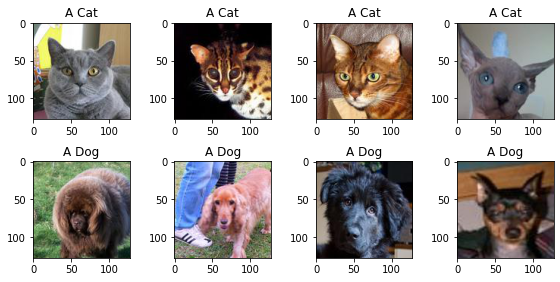

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

f, axs = plt.subplots(2, 4, figsize = (8, 4))
for i in range(4):
    img = np.random.choice(cats)
    ax = axs[0, i]
    ax.set_title("A Cat")
    ax.imshow(Image.open(img))
for i in range(4):
    img = np.random.choice(dogs)
    ax = axs[1, i]
    ax.set_title("A Dog")
    ax.imshow(Image.open(img))
plt.tight_layout()

## Getting started with pytorch

The following part provides a brief introduction to the fundamentals of `pytorch`.

### Why pytorch?

As most other popular deep learning frameworks, `pytorch` provides the following features:

- automatic differentiation,
- GPU support,
- flexible composition of neural network models,
- numerous pre-defined network components and optimization methods.

Pytorch strikes a good balance between flexibility, usability and performance, making it well suited for an introductory exercise as this one. There of course exist quite a few alternative frameworks, but the general concepts that you will learn in this exercise will apply also for them.

### Accessing documentation

Note that you can access source code documentation from inside the jupyter notebook using `?` and the `help` function. Documentation of the different torch modules can be found on the [pytorch home page](https://pytorch.org/docs/stable/index.html). 

In [0]:
import torch
help(torch.tensor)

Help on built-in function tensor:

tensor(...)
    tensor(data, dtype=None, device=None, requires_grad=False, pin_memory=False) -> Tensor
    
    Constructs a tensor with :attr:`data`.
    
    .. warning::
    
        :func:`torch.tensor` always copies :attr:`data`. If you have a Tensor
        ``data`` and want to avoid a copy, use :func:`torch.Tensor.requires_grad_`
        or :func:`torch.Tensor.detach`.
        If you have a NumPy ``ndarray`` and want to avoid a copy, use
        :func:`torch.as_tensor`.
    
    .. warning::
    
        When data is a tensor `x`, :func:`torch.tensor` reads out 'the data' from whatever it is passed,
        and constructs a leaf variable. Therefore ``torch.tensor(x)`` is equivalent to ``x.clone().detach()``
        and ``torch.tensor(x, requires_grad=True)`` is equivalent to ``x.clone().detach().requires_grad_(True)``.
        The equivalents using ``clone()`` and ``detach()`` are recommended.
    
    Args:
        data (array_like): Initial d

#### Tensors

Tensors are a fundamental concept of `pytorch`, as well as most other deep learning frameworks. A tensor  designates a collection of elements that are organized on a multi-dimensional grid. You may think of them as a generalization of vectors or matrices: The elements in a vector are organized along 1 dimension, whereas in a matrix they are organized along 2 dimensions.

A typical application of tensors is to hold images. As an example, we can load an image of a dog into a `torch.tensor`:

In [0]:
from torchvision.transforms.functional import to_tensor, to_pil_image
image_name = np.random.choice(dogs)
dog = to_tensor(Image.open(image_name))
print("The size of 'dog' is:", dog.size())
dog

The size of 'dog' is: torch.Size([3, 128, 128])


tensor([[[0.1608, 0.1569, 0.0980,  ..., 0.3059, 0.3412, 0.4353],
         [0.1922, 0.1843, 0.1176,  ..., 0.3529, 0.3882, 0.4353],
         [0.1294, 0.1373, 0.0941,  ..., 0.3216, 0.3804, 0.3961],
         ...,
         [0.3882, 0.3647, 0.3451,  ..., 0.5176, 0.5529, 0.5569],
         [0.3725, 0.4196, 0.3922,  ..., 0.4980, 0.5059, 0.5608],
         [0.3765, 0.4980, 0.4510,  ..., 0.4863, 0.4667, 0.5569]],

        [[0.2000, 0.1961, 0.1373,  ..., 0.3137, 0.3490, 0.4431],
         [0.2235, 0.2118, 0.1451,  ..., 0.3608, 0.3961, 0.4431],
         [0.1608, 0.1686, 0.1255,  ..., 0.3294, 0.3882, 0.4039],
         ...,
         [0.5059, 0.4824, 0.4745,  ..., 0.5569, 0.5922, 0.5961],
         [0.4902, 0.5490, 0.5216,  ..., 0.5412, 0.5412, 0.5961],
         [0.5059, 0.6275, 0.5804,  ..., 0.5333, 0.5059, 0.5922]],

        [[0.1647, 0.1608, 0.1020,  ..., 0.1294, 0.1647, 0.2588],
         [0.1804, 0.1804, 0.1137,  ..., 0.1765, 0.2118, 0.2588],
         [0.1176, 0.1255, 0.0824,  ..., 0.1451, 0.2039, 0.

It becomes interesting when we start applying mathematical operations to tensors. For example we can compute the average of a cat and a dog. Note that all common mathematical operators (`+`, `-` `*`, `**`, ...) are defined on tensors.

Text(0.5, 1.0, 'A cat/dog average')

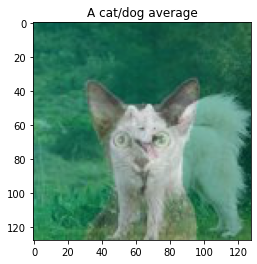

In [0]:
image_name = np.random.choice(cats)
cat = to_tensor(Image.open(image_name))
plt.imshow(to_pil_image(0.5 * (cat + dog)))
plt.title("A cat/dog average")

### Common tensor operations

There are many operations available on tensors and most of them follow the names used in `numpy`. In general, you can expect there to be an operation for most tasks at hand, so make sure you check the `pytorch` documentation search engine before you start cooking up something on your own.

#### Creation

In [0]:
import torch
ones = torch.ones(10, 10)
zeros = torch.zeros(10, 10)
rand = torch.randn(10, 10)

#### Mathematical operations

In [0]:
rand1 = torch.add(ones, rand)
p = torch.sigmoid(rand)
exp = torch.exp(rand)

#### Type conversions

As with `numpy.ndarray`s, the elements in a `torch.tensor` can have different data types. You can convert between different data types using the `to` member function.


In [0]:
print("The data type of p:", p.dtype)
p_short = p.to(torch.short)
print("The data type of p_short:", p_short.dtype)

The data type of p: torch.float32
The data type of p_short: torch.int16


For ML tasks you typically want to use [single-precision floating point numbers](https://en.wikipedia.org/wiki/Single-precision_floating-point_format) (`torch.float32`). In general you will not have to worry too much about the data type, however, older versions of `pytorch` will throw errors when operations are performed on tensors with different numeric types.

In [0]:
p + p_short # Fails on older version of pytorch.

tensor([[0.3174, 0.2412, 0.4276, 0.7547, 0.2421, 0.6947, 0.7377, 0.4746, 0.4912,
         0.8484],
        [0.2772, 0.0945, 0.6449, 0.0988, 0.6361, 0.6562, 0.2669, 0.4547, 0.4275,
         0.3075],
        [0.5223, 0.3642, 0.6913, 0.3080, 0.3674, 0.7974, 0.7598, 0.6883, 0.2245,
         0.5039],
        [0.2701, 0.3440, 0.5608, 0.4883, 0.2850, 0.4917, 0.6084, 0.6625, 0.6385,
         0.0998],
        [0.7113, 0.8442, 0.5602, 0.2488, 0.3306, 0.3640, 0.5399, 0.3417, 0.6199,
         0.2531],
        [0.2847, 0.8505, 0.2819, 0.1298, 0.1625, 0.6039, 0.7585, 0.1858, 0.1010,
         0.1584],
        [0.2704, 0.8797, 0.2185, 0.6166, 0.1430, 0.3151, 0.3578, 0.7006, 0.7091,
         0.8183],
        [0.7974, 0.4351, 0.6606, 0.1480, 0.6613, 0.7889, 0.3378, 0.8179, 0.6777,
         0.2783],
        [0.2940, 0.4366, 0.1843, 0.7331, 0.5312, 0.5607, 0.6858, 0.7476, 0.7592,
         0.4215],
        [0.4491, 0.3802, 0.1431, 0.5696, 0.2160, 0.3744, 0.9583, 0.2938, 0.5430,
         0.2716]])

In [0]:
p2 = p + p_short.float() # short for p_double.to(torch.float32)

#### Conversion from and to numpy arrays

numpy arrays can be converted directly to pytorch tensors using the `torch.tensor` function.

Converting `pytorch` tensors to numpy arrays can be done using the `numpy()` member function. If `pytorch` tracks the gradient of a tensor, then you will also need to call the `detach()` member function.

In [0]:
t_numpy = np.random.rand(2, 2)
t = torch.tensor(t_numpy)
print("Type of t:", type(t_numpy))
print("Type of t_pytorch:", type(t))
print("Type of t_pytorch.numpy():", type(t.numpy()))

Type of t: <class 'numpy.ndarray'>
Type of t_pytorch: <class 'torch.Tensor'>
Type of t_pytorch.numpy(): <class 'numpy.ndarray'>


In [0]:
t.requires_grad = True
#t.numpy() # Doesn't work
t.detach().numpy() # Works

array([[0.23068769, 0.91201349],
       [0.27958773, 0.68373557]])

### Automatic differentiation

One of the core strengths of pytorch is that it let's you copute complex mathematical operations on tensors and compute their derivatives. Remember, that this is an important part of training neural networks: In order to minimize the loss function using gradient descent, it is of course required to first compute the gradients. Luckily, `pytorch`'s `autograd` module can take care of all the complicated calculations that are required to compute the gradients of neural networks.

Computing gradients w.r.t to a given tensor involves the following steps:
1. Create a tensor and set the `requires_grad` attribute to `True`,
2. apply mathematical operations,
3. call the `backward()` function of the result tensor to compute the gradients.

> *Note:* Step 1 is not required for parameters of networks, whose gradients are computed by default when the model is in training mode.

As an example, take the following operation:

In [0]:
x = torch.linspace(-4, 4, 101, requires_grad=True)
y = torch.sigmoid(x)
z = y.sum()
z.backward()
dzdx = x.grad

Text(0, 0.5, 'y')

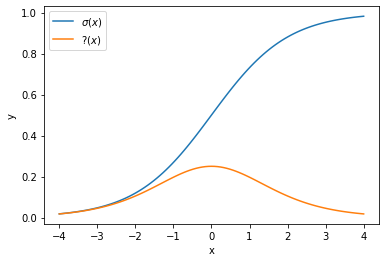

In [0]:
f, ax = plt.subplots(1, 1)
ax.plot(x.detach().numpy(),
        y.detach().numpy(),
        label = "$\sigma(x)$")
ax.plot(x.detach().numpy(),
        dzdx.numpy(),
        label = "$?(x)$")
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")

### [Exercise 1: Derivatives of activation functions, 1 point] 

Write down analytical expressions for the function $\sigma(x)$ and $?$ shown above.

$\underline{\textbf{Answer:}}$

For $ -4\leq x_{i} \leq 4,\;\; i = 1,2,...101 ,\;\; \Delta x = \frac{x_{n}-x_{1}}{100} = \frac{4-(-4)}{100} = \frac{8}{100} = 0.08 $

$$ x_{i+1} = x_{i} + \Delta x $$

$$ x =\begin{bmatrix}
x_{1} & x_{2} & \cdot\cdot\cdot & x_{101}
\end{bmatrix} $$ 

$$ \sigma(x) = \begin{bmatrix}
\sigma(x_{1}) & \sigma(x_{2}) & \cdot\cdot\cdot & \sigma(x_{101}) \end{bmatrix}=\begin{bmatrix}\frac{1}{(1+exp(-x_{1}))} & \frac{1}{(1+exp(-x_{2}))} & \cdot\cdot\cdot & \frac{1}{(1+exp(-x_{101})}\end{bmatrix}
$$

$$z = \sum_{i=1}^{101}\sigma(x_{i}) $$

$$ ?(x) =  \frac{\partial z_{i}}{\partial x_{i}} = \frac{\partial}{\partial x_{i}} \sigma(x_{i})=
\begin{bmatrix}
\frac{ e^{-x_{1}}}{(1+e^{-x_{1}})^{2}} & \frac{ e^{-x_{2}}}{(1+e^{-x_{2}})^{2}} & \cdot\cdot\cdot & \frac{ e^{-x_{101}}}{(1+e^{-x_{101}})^{2}}
\end{bmatrix} $$

### GPU acceleration

Training complex networks is a computationally demanding task. To shorten training times, caluclations are typically performed on specialized hardware that was traditionally used to render 3D graphics on computers, so called graphic processing units (GPUs) or graphic cards . GPUs are in general more efficient in performing  highly-parallel computational tasks than CPUs, which are the chips that perform all 'standard' calculations in a PC. In `pytorch`, all oprations on tensors can be performed on a GPU using NVIDIA's CUDA computing platforms (https://en.wikipedia.org/wiki/CUDA).

The different processors that can be used for calculations, i.e. CPU or GPU, are represented in `pytorch` as devices. Each tensor has an associated device on which its data is located.
The default device is represented by `torch.device("cpu")`. By default, all calculations are executed on the CPU.  In order to be able to perform calculations on a tensor, you need to move its data to the GPU's memory.

In [0]:
# First check if CUDA is available.
print(torch.cuda.is_available())
cuda = torch.device("cuda")
cpu = torch.device("cpu")

True


Below, we will perform a quick demonstration of how much faster matrix multiplication becomes when executed on a  GPU.

In [0]:
W = torch.rand(512, 512)
def matmul_cpu():
    result = W
    for i in range(10):
        result = torch.matmul(W, result)
    return result
        
%time matmul_cpu()

CPU times: user 34.9 ms, sys: 1.98 ms, total: 36.8 ms
Wall time: 37 ms


tensor([[6.3568e+23, 6.0436e+23, 6.2851e+23,  ..., 6.3298e+23, 6.0794e+23,
         6.0310e+23],
        [6.5205e+23, 6.1992e+23, 6.4470e+23,  ..., 6.4928e+23, 6.2359e+23,
         6.1863e+23],
        [6.1215e+23, 5.8198e+23, 6.0524e+23,  ..., 6.0955e+23, 5.8543e+23,
         5.8077e+23],
        ...,
        [5.9106e+23, 5.6193e+23, 5.8439e+23,  ..., 5.8855e+23, 5.6526e+23,
         5.6076e+23],
        [6.2236e+23, 5.9170e+23, 6.1534e+23,  ..., 6.1972e+23, 5.9520e+23,
         5.9046e+23],
        [6.1090e+23, 5.8080e+23, 6.0401e+23,  ..., 6.0831e+23, 5.8424e+23,
         5.7959e+23]])

In [0]:
W_cuda = W.to(cuda)

def matmul_gpu():
    result = W_cuda
    for i in range(10):
        result = torch.matmul(W_cuda, result)
    return result
        
matmul_gpu() # First time using GPU can incur some overhead.
%time matmul_gpu()

CPU times: user 147 µs, sys: 3 µs, total: 150 µs
Wall time: 153 µs


tensor([[6.3568e+23, 6.0436e+23, 6.2851e+23,  ..., 6.3298e+23, 6.0794e+23,
         6.0310e+23],
        [6.5205e+23, 6.1992e+23, 6.4470e+23,  ..., 6.4928e+23, 6.2359e+23,
         6.1863e+23],
        [6.1215e+23, 5.8198e+23, 6.0524e+23,  ..., 6.0955e+23, 5.8543e+23,
         5.8077e+23],
        ...,
        [5.9106e+23, 5.6193e+23, 5.8439e+23,  ..., 5.8855e+23, 5.6526e+23,
         5.6076e+23],
        [6.2236e+23, 5.9170e+23, 6.1534e+23,  ..., 6.1972e+23, 5.9520e+23,
         5.9046e+23],
        [6.1090e+23, 5.8080e+23, 6.0401e+23,  ..., 6.0831e+23, 5.8424e+23,
         5.7959e+23]], device='cuda:0')

The `%time` command displays CPU and Wall time for the execution of the two functions. The CPU time is split up in `user` time, which is the time spent executing only your code, and `sys` time, which is the time spent executing system kernel code required for example to load data from disk. Note that the CPU time is computed per core, so when your code runs on multiple cores the resulting CPU time is the sum of the time each core spends computing.

The wall time shows the total time that it took to execute the function. Since CPU time is calculated per core, the wall time can actually be lower than the CPU time for code that is executed on multiple CPUs in parallel.

To compare the absolute execution time for the two functions it is therefore most meaningful to compare the displayed wall times. As you should see from them, calculating the matrix power on the GPU is substantially faster than calculating it on the CPU.

## Loading the data

To train a network on the `catsndogs` dataset, we need to load the images into tensors. The `catsndogs.training` module has an attribute `folder`, which points to the root folder containing the training data. The root folder contains a `cat` and a `dog` folder which holds the images of cats and dogs, respectively.


Using the `torchvision.datasets.ImageFolder` class, data that is organized in a folder structure like this can be turned directly into a dataset for training ML algorithms. The dataset provides access to the images as input and as an integer representations of the class labels as output.

In [0]:
from catsndogs.training import folder
from torchvision.datasets import ImageFolder

images = ImageFolder(folder)

You can load a sample from the training data by indexing the `images` object, which will return a tuple `(image, label)` containing the loaded image and corresponding label.

The type of image is: <class 'PIL.Image.Image'>
The label is: 0


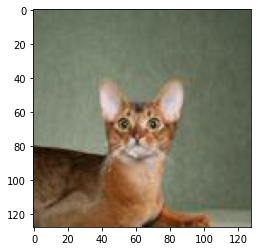

In [0]:
image, label = images[0]
plt.imshow(image)
print("The type of image is:", type(image))
print("The label is:", label)

However, as the code above shows, the type of the loaded image is a `PIL` image and not a tensor. To automatically transform the loaded image into a tensor, you can make use of the `transformation` parameter of the `ImageFolder` class.

The cell below adds a composition of two transforms to the dataset. The two transforms are applied sequentially to the image object that would otherwise be returned from the dataset. The first transform turns the image into a torch tensor and the second transform normalizes the image values so that they lie in the range $[-1, 1]$.

> Note: Input data that is not centered around zero can cause convergence problems during training, so it is usually a good idea to normalize input data to a range centered around 0.

In [0]:
from torchvision.transforms import Compose, ToTensor, Normalize

transform = Compose([ToTensor(),
                     Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
images = ImageFolder(folder, transform=transform)
image, label = images[0]
print("Type of image is now:", type(image))

Type of image is now: <class 'torch.Tensor'>


In [0]:
# This function inverts the transformation of the input images.
def to_image(tensor):
    tensor = 0.5 * (tensor + 1.0)
    return to_pil_image(tensor)

For the training, we further split the data into training and validation set:

In [0]:
n_train = int(0.9 * len(images))
n_val = len(images) - n_train
training_data, validation_data = torch.utils.data.random_split(images, (n_train, n_val))

## [Exercise 2: Training a fully-connected network, 5 points]
## Defining a neural network model

Neural networks in `pytorch` are represented using the [`torch.nn.Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) class. The typical way to define a neural network model is to define a new class that inherits from the `Module` class.

### 2, a) (2 points)

Inspect the code given below and, using the documentation of the [`torch.nn`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) module, answer the following questions:
- What is the network of instances of the `FullyConnected` class?
- What activations functions are applied in the hidden layers?
- What activation function is used for the output?
- How are the parameters of the network initialized? Why is this important?

$\underline{\textbf{Answer:}}$

1. The network of instance of the FullyConnected class is using the **Directed Acylic Graph (DAG)**. 
2. The activations functions applied in the hidden layers is **ReLU**.
3. The activation function used for the output is **Linear activation function**.
4. The parameters are initialized by using **He initialization** since we used__init__ method in pytorch to initialize the layers of the network. The use of **He initialization** is important due to the fact that we are using ReLU activation function in the hidden layers and it is the best method for that specific use. Generally, there are various different initialization methods. However, it is shown in the literature that a better random initialization method will results in **higher accuracy** and **better convergence** due to the fact that the initial transient learning phase poses a substantial bottleneck to learning. Moreover, since we are doing iterable computation in neural network, it would be best to have use a method which results in **the lowest error rate** and **least number of iterations**. In **He initialization**, the variance of the randomly initialized weights is as shown below.

$$ v^{2} = \frac{2}{N}  $$ 


In [0]:
from torch import nn
from torch import nn
from torch.nn.functional import log_softmax

class FullyConnected(nn.Module):
    """
    Usually, this docstring should contain useful information about this
    class but this would make the exercise too easy.
    """
    def __init__(self,
                 input_features,
                 width):
        """
        Create a new mysterious network.
        """
        super().__init__()
        self.input_features = input_features
        self.fc_1 = nn.Linear(input_features, width)
        self.fc_2 = nn.Linear(width, width)
        self.fc_3 = nn.Linear(width, width)
        self.fc_4 = nn.Linear(width, 1)
        
    def forward(self, x):
        """
        The forward method required by nn.Module base class.
        """
        x = x.flatten(1, -1)
        x = self.fc_1(x)
        x = torch.relu(x)
        x = self.fc_2(x)
        x = torch.relu(x)
        x = self.fc_3(x)
        x = torch.relu(x)
        x = self.fc_4(x)
        return x
    

## The training loop

In the cell below you find code for a typical training loop in `pytorch`. 

### 2, b) (1 point)

Look at the function below. Most of the actual training functionality is abstracted away in the arguments provided to the function. For each of the arguments, describe what tasks the corresponding object has to perform so that this method can be used to train a neural network.

$\underline{\textbf{Answer:}}$

 training_loader $\rightarrow$ The task that it has to perform is to load the training datas from some source in the pytorch library by firstly importing the datas. Then, splitting the datas into training and validation. And then iterating over the datas to group it in batches.

validation_loader $\rightarrow$ The task that it has to do is similar to training_loader except that it is used later for validation instead of training.

model $\rightarrow$ Its task is to builds the model by calling the function that we have implemented before i.e. (loss,optimizer etc.). Typically, the output of this object is the training/validation accuracy as well as training/validation dataset dimensions.

loss $\rightarrow$ Its task is to compute the cost/loss function of the neural network based on the loss function chosen in torch.nn.

optimizer $\rightarrow$ Its task is to optimize the model so that the loss function is minimized. It could be done by certain algorithm e.g. SGD or Adam. Typically, learning rate must be one of its input. 

device $\rightarrow$ Its task is to represents the device on which a torch.Tensor is or will be allocated. It contains a device type ('cpu' or 'cuda') and optional device ordinal for the device type.


In [0]:
def train_epoch(training_loader,
                validation_loader,
                model,
                loss,
                optimizer,
                device):
    """
    Again, this should be a usefule
    
    """
    
    model.train()
    model.to(device)
    
    training_loss = 0.0
    n = len(training_loader)
    
    for i, (x, y) in enumerate(training_loader):
        
        # Set gradients to zero.
        optimizer.zero_grad()
        
        # Move input to device
        x = x.to(device)
        y = y.to(device)
        
        # Predict output, compute loss, perform optimizer step.
        y_pred = model(x)
        l = loss(y_pred, y.view(-1, 1).float())
        l.backward()
        optimizer.step()
        
        training_loss += l.item()
        print("Batch ({} / {}): Loss {:.2f}".format(i, n, l.item()), end="\r")
        
    training_loss /= n
        
    model.eval()
    validation_loss = 0.0
    n = len(validation_loader)
    
    for i, (x, y) in enumerate(validation_loader):
        # Move input to device
        x = x.to(device)
        y = y.to(device)
        
        # Predict output, compute loss, perform optimizer step.
        y_pred = model(x)
        l = loss(y_pred, y.view(-1, 1).float())
        
        validation_loss += l.item()
    validation_loss /= n
    
    model.to(torch.device("cpu"))
    
    return (training_loss, validation_loss)

## The optimizer object

In the code above the optimization method was hidden in the `optimizer` object. To understand how to write a suitable optimizer, you first need to understand a bit more about the role of `Module` objects in `pytorch`. The `torch.nn.Module` class is the base class for all neural networks and the components that make up neural networks. Module objects typically have trainable parameters. These trainable parameters of a module can be accessed via its `parameters()` member function. When a module contains attributes that are themselves `Module` instances, then  the `parameters()` function of the containing module will automatically list the trainable parameters of its `Module` attributes.

In order to  train a network, the optimizer needs to be aware of the module's parameters. In `pytorch` an optimizer object therefore always needs to be instantiated with a list of parameters that should be trained. In addition to that, an optimizer typically provides a function to set the gradients of the module parameters to zero. This is because gradients in pytorch are accumulated between consecutive calls to the `backward()` function.
This makes it necessary to set the gradients to zero between to training iterations.

### 2, c)  (0.5 points)

Complete the code below so that the `step` method of the `SGD` class performs gradient descent on the provided list of parameters.

> **Hint 1:** The `parameters()` member function returns a list of tensors representing the weight matrices and bias vectors in a network. Given a tensor `p`, you can access its gradients using the `p.grad` attribute.

> **Hint 2:** Because of the way `pytorch`'s autograd function works, changing the  value of a parameter `p` has to be done using its `p.data` attribute:

```
p.data = ...
```

In [0]:

class GradientDescent():
    """
    A gradient descent optimizer.
    """
    def __init__(self,
                 parameters,
                 learning_rate):
        """
        Create a gradient descent optimizer.
        
        Arguments:
            parameters: Iterable providing the parameters to optimize.
            learning_rate: The learning rate to use for optimization.
        """
        self.parameters = list(parameters)
        self.learning_rate = learning_rate

        
    def zero_grad(self):
        for p in self.parameters:
            if not p.grad is None:
                p.grad.zero_()
                
    @torch.no_grad()
    def step(self):
        """
        Perform a gradient descent step on parameters associated to this optimizer.
        """
        loss = None

        for p in self.parameters:
          if p.grad is None:
            continue
          d_p = p.grad
          p.add_(d_p, alpha=-self.learning_rate)


        return loss


## Training the network

With the optimizer, the model and the training loop in place we are close to being able to start training the network, however a few details remain to be sorted out.

The `training_data` and `validation_data` object defined above can be used to iterate over the data, but only on a per sample basis. For the training a neural network, however, we typically want to iterate through the data in batches. To take care of this , `pytorch` provides the `DataLoader` class, which can be used to batch and shuffle existing data:

In [0]:
from  torch.utils.data import DataLoader
training_loader = DataLoader(training_data, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=32, shuffle=True)

Next, we need to choose a suitable training loss to minimize.

### 2, d) (0.5 points)

Choose a suitable loss function from the [`torch.nn`](https://pytorch.org/docs/stable/nn.html) module and assign an instance of it to the loss variable in the code cell below

> **Hint:** Note that in the `train_epoch` function defined above loss function is applied **directly** to the output of the network. In your choice of the loss function you thus need to consider the output activation of the network.

In [0]:
loss = torch.nn.BCEWithLogitsLoss()

Finally, we choose the device to run the training on. If available, you should use a GPU because it will be substantially faster.


In [0]:
if torch.cuda.is_available():
    device = cuda
else:
    device = cpu

### 1, e) (1 point)

Train the neural network for a least 10 epochs, then reduce the learning rate and continue training for at least another ten epochs. Plot the resulting training and validation losses. Was the training successful?

The training was pretty successful as the during both simulations, the training loss is continuously decreasing from 0.65 to below 0.2. However, the validation loss seems to be slightly increasing in the second simulation.


First simulation, 10 epochs, learning rate=0.01


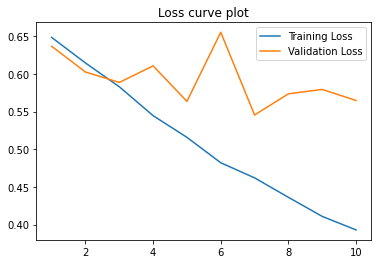

Second simulation, 10 epochs, learning rate=0.005


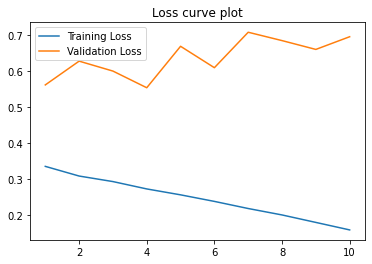

In [0]:
#initiate model with 20 neuron in hidden layer
model=FullyConnected(49152, 20).cuda()

# Plot function
def showPlot( num_epoches, hold_training_loss, hold_validation_loss):
  ecpoch=np.arange(1, num_epoches+1)

  plt.plot(ecpoch, hold_training_loss)
  plt.plot(ecpoch, hold_validation_loss)

  plt.title('Loss curve plot')
  plt.legend(['Training Loss', 'Validation Loss'])
  plt.show()


#First simulation, epoch=10, learning rate=0.01
#optim with GradientDescent method with learning rate=0.01
learning_rate=0.01
optimizer=GradientDescent(model.parameters(), learning_rate=learning_rate)
#train for 10 epochs
hold_training_loss=[]
hold_validation_loss=[]
num_epoches=10
print('First simulation, '+str(num_epoches)+' epochs, learning rate='+str(learning_rate))
for i in range(num_epoches):
  training_loss, validation_loss=train_epoch(training_loader,validation_loader, model,loss,optimizer,device);
  hold_training_loss.append(training_loss)
  hold_validation_loss.append(validation_loss) 
showPlot(num_epoches, hold_training_loss, hold_validation_loss)

#Second simulation, epoch=10, learning rate=0.005
#optim with GradientDescent method with learning rate=0.005
learning_rate=0.005
optimizer=GradientDescent(model.parameters(), learning_rate=learning_rate)
#train for 10 epochs
hold_training_loss=[]
hold_validation_loss=[]
num_epoches=10
print('Second simulation, '+str(num_epoches)+' epochs, learning rate='+str(learning_rate))
for i in range(num_epoches):
  training_loss, validation_loss=train_epoch(training_loader,validation_loader, model,loss,optimizer,device);
  hold_training_loss.append(training_loss)
  hold_validation_loss.append(validation_loss) 
showPlot(num_epoches, hold_training_loss, hold_validation_loss)

## [Exercise 3: Training on augmented training data, 3 points]

If you trained the model long enough, you should see that the model overfits on the training data, which 
causes the generalization error to increase.  This is not surprising considering that the training set is rather small. A technique to counteract overfitting is to augment the training data by artificially increasing the size of the training data set. In this case we will use random transforms that mimic the effect of perspective or changes in lighting to the images.

### 3, a) (1 point)

Create an augmented training data set by adding suitable transforms from the [`torchvision.transforms`](https://pytorch.org/docs/stable/torchvision/transforms.html) module to the transformations that are applied when
the images are loaded. Suitable transforms to consider are `RandomAffine` and `ColorJitter`.

> **Hint**: Applying these transforms of course only makes sense for the training data and not the validation
 data. To ensure that this is the case do not create new `training_data` and `validation_data` objects but instead overwrite the `training_data.dataset` attribute of the existing `training_data` object, as shown below. (This is a bit hacky, but the easiest way to achieve this in the current context.)
 

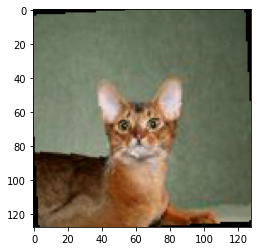

In [0]:
from torchvision import transforms ;

data_transforms = {
        'train': transforms.Compose([
            transforms.RandomAffine(15),
            transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
            ToTensor(),  Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
        ])
    }

images_augmented = ImageFolder(folder, transform=data_transforms['train'])

imagetoshow=to_image(images_augmented[0][0])
plt.imshow(imagetoshow)

training_data.dataset=images_augmented


Let's look at a preview of the augmented training data.

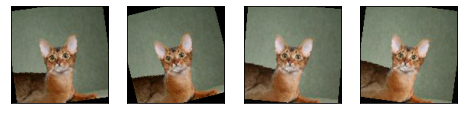

In [0]:
f, axs = plt.subplots(1, 4, figsize=(8, 2))
for i in range(4):
    ax = axs[i]
    ax.imshow(to_image(images_augmented[0][0]))
    ax.set_xticks([])
    ax.set_yticks([])

### 3, b) (1 point)

Train the fully-connected model once again on the augmented training data. You should achieve a validation loss lower than 0.6. Plot training and validation loss.

First simulation, 10 epochs, learning rate=0.1


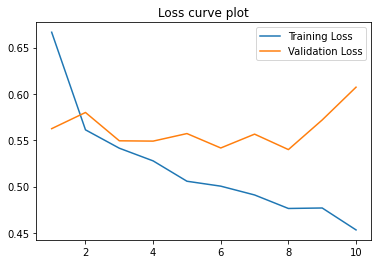

In [0]:
#initiate model with 20 neuron in hidden layer
fc=FullyConnected(49152, 20).cuda()

# Plot function
def showPlot( num_epoches, hold_training_loss, hold_validation_loss):
  ecpoch=np.arange(1, num_epoches+1)

  plt.plot(ecpoch, hold_training_loss)
  plt.plot(ecpoch, hold_validation_loss)

  plt.title('Loss curve plot')
  plt.legend(['Training Loss', 'Validation Loss'])
  plt.show()


#First simulation, epoch=10, learning rate=0.01
#optim with GradientDescent method with learning rate=0.01
learning_rate=0.1
optimizer=GradientDescent(model.parameters(), learning_rate=learning_rate)
#train for 10 epochs
hold_training_loss=[]
hold_validation_loss=[]
num_epoches=10
training_augmented_loader = DataLoader(training_data, batch_size=32, shuffle=True)
print('First simulation, '+str(num_epoches)+' epochs, learning rate='+str(learning_rate))
for i in range(num_epoches):
  training_loss, validation_loss=train_epoch(training_augmented_loader,validation_loader, model,loss,optimizer,device);
  hold_training_loss.append(training_loss)
  hold_validation_loss.append(validation_loss) 

showPlot(num_epoches, hold_training_loss, hold_validation_loss)


### 3, c) (1 point)

A useful performance metric for binary classification tasks  is the [receiver operating characteristic (ROC)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic). Complete the code below and write a function that computes the true positive and false positive rate for varying values of the discrimination threshold $p \in [0, 1]$. Then, using the code below, plot the ROC. What is the significance of the line black, dashed line?\

$\underline{\textbf{Answer:}}$

The significance of the black-dashed line is for dividing the ROC space into two different regions regarding its performance in comparison to random guess. Upper side of the region signifies the good classification results (i.e. better than random guess) whereas the lower side of the region signifies bad classification results (i.e. worse than random guess).

Text(0.5, 1.0, 'Receiver operator characteristic')

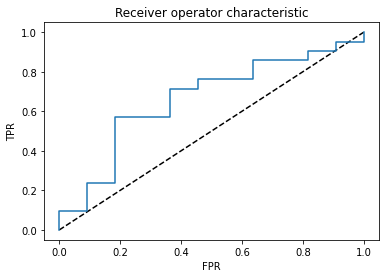

In [0]:
from sklearn.metrics import roc_curve

def receiver_operating_characteristic(model,
                                      validation_loader,
                                      ps):
    """
    Computes receiver operating characteristic for given model and
    validation data.
    
    Arguments:
        model: The pytorch model to evaluate.
        validation_loader: torch DataLoader to use to iterate over validation data.
        ps: Iterable containing the values of the discrimination threshold in
           increasing order.
    Returns:
        (fpr, tpr): Tuple containing the false positive rates (fpr) and the true
            positive rates as numpy.ndarrays.
    """
    fpr_temp_array=[]
    tpr_temp_array=[]
    optimizer=GradientDescent(model.parameters(), learning_rate=0.1)
    
    for i,  (x, y) in enumerate(validation_loader):
        # Predict output, compute loss, perform optimizer step.
        optimizer.zero_grad()
        y_pred = model(x)
        l = loss(y_pred, y.view(-1, 1).float())
        l.backward()
        optimizer.step()
        
        fpr_temp, tpr_temp, threshold = roc_curve(y.detach().numpy(), y_pred.detach().numpy())
        fpr_temp_array.append(fpr_temp)
        tpr_temp_array.append(tpr_temp)
    fpr=fpr_temp_array[0]
    tpr=tpr_temp_array[0]
    return fpr, tpr

fc=FullyConnected(49152, 20)

fpr, tpr = receiver_operating_characteristic(fc, validation_loader, np.linspace(0, 1, 101))
# Plot ROC curve
x = np.linspace(0, 1, 101)
f, ax = plt.subplots(1, 1)
ax.plot(x, x, c="k", ls="--")
ax.plot(fpr, tpr)
ax.set_ylabel("TPR")
ax.set_xlabel("FPR")
ax.set_title("Receiver operator characteristic")

Finally, let's look at the prediction for samples from the validation set. On average, your model should get more images right than wrong.

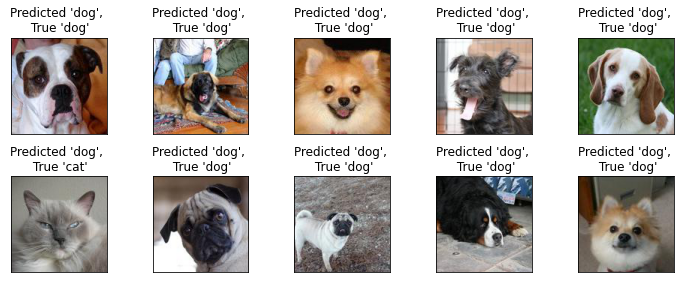

In [0]:
def index_to_pet(index):
    
    if index == 0:
        return "cat"
    else:
        return "dog"
    
def plot_results(model, validation_data):
    model.to(torch.device("cpu"))
    f, axs = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(10):

        # Make prediction on random validation sample
        index = np.random.randint(len(validation_data))
        x, y = validation_data[index]
        c = torch.sigmoid(model(x.unsqueeze(0))) >= 0.5
        x = 0.5 * (x + 1.0)
        
        ax = axs.ravel()[i]
        ax.imshow(to_pil_image(x))
        title = "Predicted '{}', \n True '{}'"
        title = title.format(index_to_pet(c), index_to_pet(y))
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.tight_layout()
        
plot_results(fc, validation_data)

## [Exercise 4: Training a convolutional  neural network, 4 points]

### 4, a) (2 points)

Define and train a convolutional network with the following architecture:
- 2D conv. layer: $32$ filters, kernel size $5 \times 5$, stride 1
- ReLU activation function
- Max pooling: kernel size $4 \times 4$, stride 4
- 2D conv. layer: $64$ filters, kernel size $5 \times 5$, stride 1
- ReLU activation function
- Max pooling: kernel size $2 \times 2$, stride 2
- 2D conv. layer: $128$ filters, kernel size $3 \times 3$, stride 1
- ReLU activation function
- Max pooling: kernel size $2 \times 2$, stride 2
- Fully connected: 512 neurons
- ReLU activation function
- Fully connected: 512 neurons
    
With this architecture, you should achive a validation loss below $0.3$. 

> **Hint:** You can find all necessary components to implement the convolutional network in the [`torch.nn`](https://pytorch.org/docs/stable/nn.html) module.

In [0]:
import warnings
warnings.filterwarnings('ignore')

class ConvolutionalModel(torch.nn.Module):   
    def __init__(self):
        super(ConvolutionalModel, self).__init__()

        self.cnn_layers = torch.nn.Sequential(
            # Defining 2D convolution layer
            torch.nn.Conv2d(3, 32, kernel_size=5, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=4, stride=4),

            # Defining 2D convolution layer
            torch.nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),

            # Defining 2D convolution layer
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),                        
        )
        
        self.fully_connected_layers = torch.nn.Sequential(
            FullyConnected(6272, 512),
            FullyConnected(1, 512)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        #x = x.view(x.size(0), -1)
        x = torch.relu(x)
        x = self.fully_connected_layers(x)
        x = torch.relu(x)
        
        return x

# defining the model
model = ConvolutionalModel()
# defining the optimizer
learning_rate=0.001
optimizer=GradientDescent(model.parameters(), learning_rate=learning_rate)
# defining the loss function
loss=torch.nn.SmoothL1Loss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    loss = loss.cuda()
    
print(model)

#TODO set train x train y using traing loader and validation loader
def train_epoch(training_loader,
                validation_loader,
                model,
                loss,
                optimizer,
                device):
    """
    Again, this should be a usefule
    
    """
    
    model.train()
    model.to(device)
    
    training_loss = 0.0
    n = len(training_loader)
    n2= len(validation_loader)
    for i, (x, y) in enumerate(training_loader):
        
        # Set gradients to zero.
        optimizer.zero_grad()
        
        # Move input to device
        x = x.to(device)
        y = y.to(device)
        
        # Predict output, compute loss, perform optimizer step.
        y_pred = model(x)
        loss_train = loss(y_pred, y.view(-1, 1).float())
        loss_train.backward()
        
        
        optimizer.step()

        loss_train = loss(y_pred, y.view(-1, 1).float())
        
        training_loss += loss_train.item()
    training_loss /= n
        
    model.eval()
    validation_loss = 0.0
    n = len(validation_loader)
    
    for i, (x, y) in enumerate(validation_loader):
        # Move input to device
        x = x.to(device)
        y = y.to(device)
        
        # Predict output, compute loss, perform optimizer step.
        y_pred = model(x)
        loss_val = loss(y_pred, y.view(-1, 1).float())
        
        validation_loss += loss_val.item()
    validation_loss /= n2
    
    model.to(torch.device("cpu"))
    
    return (training_loss, validation_loss)
    
training_loss, validation_loss=train_epoch(training_loader,validation_loader, model,loss,optimizer,device);
print("Validation Loss: "+str(validation_loss))


ConvolutionalModel(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fully_connected_layers): Sequential(
    (0): FullyConnected(
      (fc_1): Linear(in_features=6272, out_features=

### 4, a)  (2 points)

Tune the network architecture and training routin to achieve a validation error lower than 0.15 on the validation set. Some things you may want to try:
- Increasing the complexity of your network (more layers, filters or neurons)
- A learning rate schedule
- Checkpoints or early stopping

In [0]:
import warnings
warnings.filterwarnings('ignore')

class ConvolutionalModelBest(torch.nn.Module):   
    def __init__(self):
        super(ConvolutionalModelBest, self).__init__()

        self.cnn_layers = torch.nn.Sequential(
            # Defining 2D convolution layer
            torch.nn.Conv2d(3, 32, kernel_size=5, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=4, stride=4),

            # Defining 2D convolution layer
            torch.nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),

            # Defining 2D convolution layer
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),     

            # Defining additional 2D convolution layer
            torch.nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),                       
        )
        
        self.fully_connected_layers = torch.nn.Sequential(
            FullyConnected(2304, 512),
            torch.nn.ReLU(inplace=True),
            FullyConnected(1, 512)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = self.fully_connected_layers(x)
    
        
        return x

# defining the model
model = ConvolutionalModelBest()
# defining the optimizer
learning_rate=0.01
optimizer=GradientDescent(model.parameters(), learning_rate=learning_rate)
# defining the loss function
loss=torch.nn.SmoothL1Loss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    loss = loss.cuda()
    
print(model)

#TODO set train x train y using traing loader and validation loader
def train_epoch(training_loader,
                validation_loader,
                model,
                loss,
                optimizer,
                device):
    """
    Again, this should be a usefule
    
    """
    
    model.train()
    model.to(device)
    
    training_loss = 0.0
    n1 = len(training_loader)
    n2 = len(validation_loader)
   
    for i, (x, y) in enumerate(training_loader):
        
        # Set gradients to zero.
        optimizer.zero_grad()
        
        # Move input to device
        x = x.to(device)
        y = y.to(device)
        
        # Predict output, compute loss, perform optimizer step.
        y_pred = model(x)
        loss_train = loss(y_pred, y.view(-1, 1).float())
        loss_train.backward()
        
        
        optimizer.step()

        loss_train = loss(y_pred, y.view(-1, 1).float())
        
        training_loss += loss_train.item()
    training_loss /= n1
        
    model.eval()
    validation_loss = 0.0
    
    
    for i, (x, y) in enumerate(validation_loader):
        # Move input to device
        x = x.to(device)
        y = y.to(device)
        
        # Predict output, compute loss, perform optimizer step.
        y_pred = model(x)
        loss_val = loss(y_pred, y.view(-1, 1).float())
        
        validation_loss += loss_val.item()
    validation_loss /= n2
    
    model.to(torch.device("cpu"))
    
    return (training_loss, validation_loss)
    
training_loss, validation_loss=train_epoch(training_loader,validation_loader, model,loss,optimizer,device);
print("Validation Loss: "+str(validation_loss))


ConvolutionalModelBest(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(256, eps=1e-05, m

## [Exercise 5: Evaluation on test set, 2 points]

Now evaluate the performance of the fully-connected neural network to your best convolutional neural network on the `catsndogs` test data, which is available in `catsndogs.test` module.

- Plot ROC curves for both the fully-connected and the convolutional model.
- Compute the accuracy of each model for a discimination threshold p = 0.5
- Provide a plot of 8 images from the test set together with the prediction from the convolutional model.

accuracy score for FC is : 0.6538461538461539
accuracy score is CM is : 0.7085020242914979


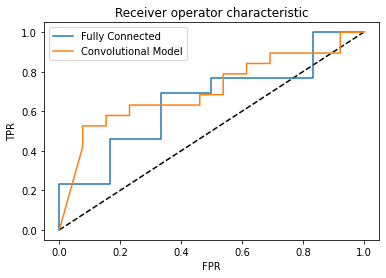

In [0]:
from sklearn.metrics import roc_curve, auc

fc=FullyConnected(49152, 20)
cm=ConvolutionalModelBest()
ps=0.5

fpr_fc, tpr_fc = receiver_operating_characteristic(fc, validation_loader, ps)
fpr_cm, tpr_cm = receiver_operating_characteristic(cm, validation_loader, ps)
roc_auc_fc = auc(fpr_fc, tpr_fc)
roc_auc_cm = auc(fpr_cm, tpr_cm)

# Plot ROC curve
x = np.linspace(0, 1, 101)
f, ax = plt.subplots(1, 1)
ax.plot(x, x, c="k", ls="--", label="")
ax.plot(fpr_fc, tpr_fc, label="Fully Connected")
ax.plot(fpr_cm, tpr_cm, label="Convolutional Model")
ax.legend()
ax.set_ylabel("TPR")
ax.set_xlabel("FPR")
ax.set_title("Receiver operator characteristic")
print('accuracy score for FC is :', roc_auc_fc)
print('accuracy score is CM is :', roc_auc_cm)

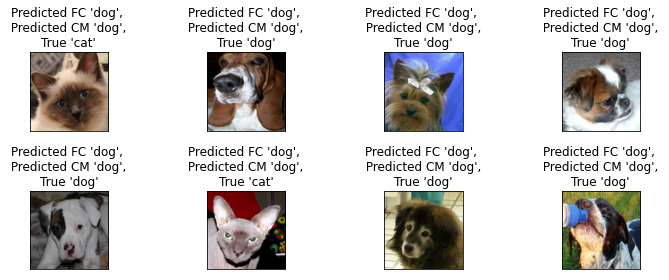

In [0]:
from catsndogs.test import cats, dogs # The lists of cat and dog images.
def index_to_pet(index):
    if index == 0:
        return "cat"
    else:
        return "dog"

def plot_results_compared(fm,cm, validation_data):
    fm.to(torch.device("cpu"))
    cm.to(torch.device("cpu"))
    f, axs = plt.subplots(2, 4, figsize=(10, 4))
    for i in range(8):
        # Make prediction on random validation sample
        index = np.random.randint(len(validation_data))
        x, y = validation_data[index]
        cfm = torch.sigmoid(fm(x.unsqueeze(0))) >= 0.5
        ccm = torch.sigmoid(cm(x.unsqueeze(0))) >= 0.5
        x = 0.5 * (x + 1.0)
        
        
        ax = axs.ravel()[i]
        ax.imshow(to_pil_image(x))
        title = "Predicted FC '{}', \n Predicted CM '{}', \nTrue '{}'"
        title = title.format(index_to_pet(cfm), index_to_pet(ccm), index_to_pet(y))
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.tight_layout()

plot_results_compared(fc, cm, validation_data)

## [Exercise 6 (Bonus*): Your algorithm in the wild, 2 points]

Acquire an image of a cat or dog resize it to size $64 \times 64$ pixels and apply your model to it. Present your results. Does it work?


*: This is bonus exercise and will give you two point that can make up for a point lost somewhere in the assignment.